# Covid 19 Deaths And Vaccination Analysis

In [14]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
# The Data has been obtained from https://ourworldindata.org/covid-vaccinations
df = pd.read_csv("C:/Users/LENOVO/Desktop/Covid_Analysis/Jupyter/CovidData.csv")
"""
The Data consists of information at continent level and at country level. 
The following analysis has been done at country level. Hence dropna method is used!
"""
df.dropna(subset=['continent'],inplace=True)
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2/24/2020,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2/25/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2/26/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2/27/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2/28/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


### Finding out countries with most deaths

In [20]:
deaths = df.groupby('location').agg({'new_deaths' : 'sum'})
deaths.sort_values('new_deaths',ascending=False,inplace=True)
df1 = deaths.head(10)
df1.reset_index(inplace=True)
df1

,location,new_deaths
0,United States,600653.0
1,Brazil,493693.0
2,India,381903.0
3,Mexico,230624.0
4,Peru,189261.0
5,United Kingdom,128190.0
6,Italy,127153.0
7,Russia,125443.0
8,France,110740.0
9,Colombia,97560.0


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 Countries with Most Deaths')

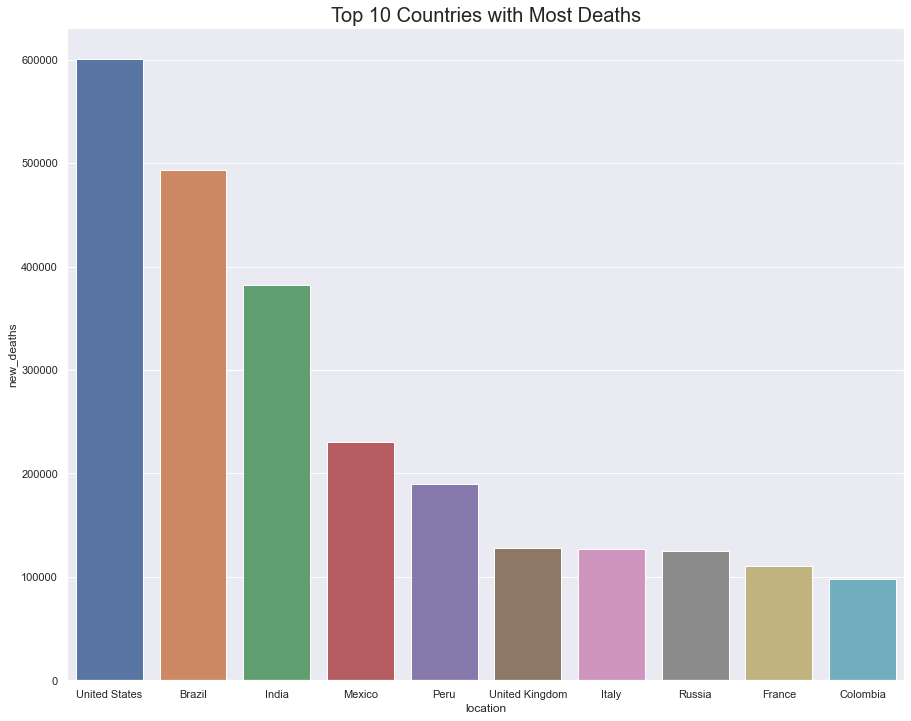

In [21]:
sns.set(rc={'figure.figsize':(15,12)})
sns.barplot(df1['location'],df1['new_deaths']).axes.set_title('Top 10 Countries with Most Deaths', fontsize = 20)

### Finding out correlation between smoking and deaths due to Covid 19

In [24]:
smokers = df[['location','population','date','new_deaths','female_smokers','male_smokers']].groupby('location').agg({'new_deaths' : 'sum', 'female_smokers' : 'mean', 'male_smokers' : 'mean','population': 'mean'})
smokers.sort_values('new_deaths',inplace = True, ascending = False)
smokers

,new_deaths,female_smokers,male_smokers,population
location,,,,
United States,600653.0,19.1,24.6,3.310026e+08
Brazil,493693.0,10.1,17.9,2.125594e+08
India,381903.0,1.9,20.6,1.380004e+09
Mexico,230624.0,6.9,21.4,1.289328e+08
Peru,189261.0,4.8,NaN,3.297185e+07
...,...,...,...,...
Macao,0.0,NaN,NaN,6.493420e+05
Bermuda,0.0,NaN,NaN,6.227300e+04
Cook Islands,0.0,NaN,NaN,1.756400e+04


<AxesSubplot:xlabel='male_smokers', ylabel='new_deaths'>

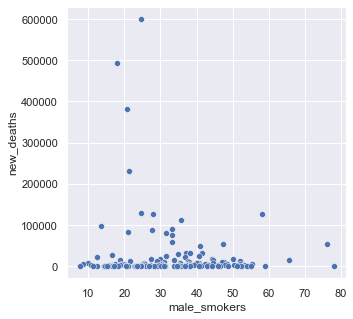

In [27]:
# The Next 2 cells shows a scatter plot between death due to Covid 19 and smoking rate in males and females gruoped by country.
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(data = smokers, y = smokers['new_deaths'] , x = smokers['male_smokers'])

<AxesSubplot:xlabel='female_smokers', ylabel='new_deaths'>

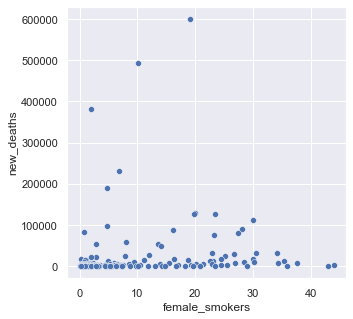

In [28]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(data = smokers, y = smokers['new_deaths'] , x = smokers['female_smokers'])

In [29]:
""""
The above 2 scatterplots show that there is no considerable correlation between smoking rate and deaths due to Covid.
The function below shows the value of Correlation Coefficient.
The value of Correlation Coefficient is not high enough to signify correlation!
"""
smokers.corr()

,new_deaths,female_smokers,male_smokers,population
new_deaths,1.000000,0.090313,-0.113124,0.438442
female_smokers,0.090313,1.000000,0.225976,-0.124258
male_smokers,-0.113124,0.225976,1.000000,0.021274
population,0.438442,-0.124258,0.021274,1.000000


### Finding Out Countries with most number of people fully vaccinated for Covid

In [36]:
vaccination = df[['location','population','date','new_tests', 'total_tests', 'people_vaccinated', 'people_fully_vaccinated']]
vaccination = vaccination.groupby('location').agg({'people_fully_vaccinated' : 'max','population': 'mean',}).sort_values('people_fully_vaccinated', ascending = False)
vaccination.reset_index(inplace=True)
vaccination['PercentPopulationvaccinated'] = vaccination['people_fully_vaccinated'] / vaccination['population']*100
vaccination

,location,people_fully_vaccinated,population,PercentPopulationvaccinated
0,China,223299000.0,1.439324e+09,15.514160
1,United States,146456124.0,3.310026e+08,44.246209
2,India,47882950.0,1.380004e+09,3.469768
3,United Kingdom,30440373.0,6.788600e+07,44.840425
4,Germany,23916490.0,8.378394e+07,28.545433
...,...,...,...,...
216,Tanzania,NaN,5.973421e+07,NaN
217,Tuvalu,NaN,1.179200e+04,NaN
218,Vanuatu,NaN,3.071500e+05,NaN
219,Vatican,NaN,8.090000e+02,NaN


### Barplot Showing Top 10 Countries with people fully vaccinated for Covid.

<AxesSubplot:xlabel='location', ylabel='people_fully_vaccinated'>

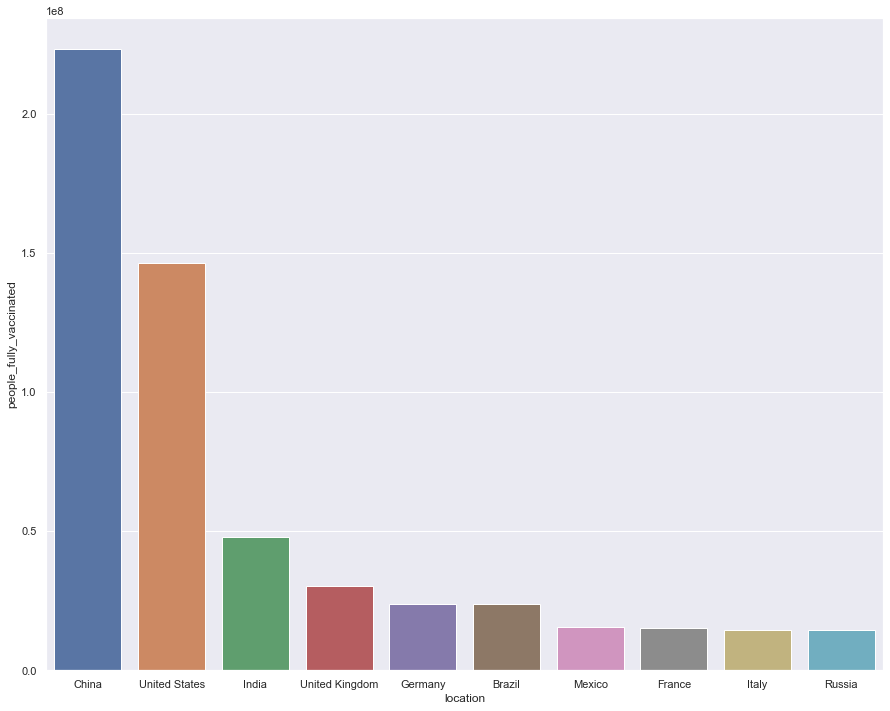

In [35]:
vac = vaccination.head(10)
sns.set(rc={'figure.figsize':(15,12)})
sns.barplot(x = vac['location'], y = vac['people_fully_vaccinated'])

### Saving the dataframe to excel for Visualization in Tableau

In [11]:
""""
The dataframe obtained in the above cell will be used for Visualization in Tableau.
Thus the dataframe is saved in an excel file.
"""
vaccination.to_excel('C:/Users/LENOVO/Desktop/Covid_Analysis/Jupyter/Tableau1.xlsx')

### Finding out percentage of population vaccinated per country over the time 

In [49]:
vaccination1 = df.loc[:,('location','population','date','new_tests', 'total_tests', 'people_vaccinated', 'people_fully_vaccinated')]
vaccination1['PercentPopulationVaccinated'] = vaccination1['people_fully_vaccinated'] / vaccination1['population']*100
vaccination1

,location,population,date,new_tests,total_tests,people_vaccinated,people_fully_vaccinated,PercentPopulationVaccinated
0,Afghanistan,38928341.0,2/24/2020,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,38928341.0,2/25/2020,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,38928341.0,2/26/2020,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,38928341.0,2/27/2020,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,38928341.0,2/28/2020,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
96203,Zimbabwe,14862927.0,6/12/2021,2637.0,579507.0,692180.0,411218.0,2.766736
96204,Zimbabwe,14862927.0,6/13/2021,1363.0,580870.0,693147.0,413911.0,2.784855
96205,Zimbabwe,14862927.0,6/14/2021,NaN,NaN,693568.0,414635.0,2.789726
96206,Zimbabwe,14862927.0,6/15/2021,NaN,NaN,NaN,NaN,NaN


### Saving the dataframe to excel for visualization in Tableau

In [14]:
""""
The dataframe obtained in the above cell will be used for Visualization in Tableau.
Thus the dataframe is saved in an excel file.
"""
vaccination1.to_excel('C:/Users/LENOVO/Desktop/Covid_Analysis/Jupyter/Tableau2.xlsx')